In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import os
import seaborn as sns
import random 
import scipy as sc
import statsmodels.api as sm
import scipy.stats as stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy as cp
import stormeunice as eun
# import multiprocessing
# import glob
# import dask
import metpy
from metpy.units import units

sns.set_theme(style="white")
sns.set_style("white")
%matplotlib inline

random.seed(10)

# Import data

In [2]:
lon_min = -15
lon_max = 5
lat_min = 45
lat_max = 60

In [3]:
# ERA5
era5_2022 = xr.open_dataset('/gf3/predict2/AWH012_LEACH_NASTORM/DATA/ERA5/EU025/sfc/2022.nc')
era5_GUST = era5_2022.fg10.sel(time=slice('2022-02-07','2022-02-22'),latitude=slice(lat_max,lat_min),longitude=slice(lon_min, lon_max)).resample(time='1d').max().load()
era5_PRES = era5_2022.msl.sel(time=slice('2022-02-07','2022-02-22'),latitude=slice(lat_max,lat_min),longitude=slice(lon_min, lon_max)).resample(time='1d').max().load()

In [55]:
inidates = ['2022-02-14']
experiments = ['incr'] #['pi', 'curr', 'incr']

for experimemt in experiments:
    for inidate in inidates:
        eps_incr = eun.data.Data.get_eps_data(experiments, inidate = inidate) # TODO: rewrite function so it can deal with multiple inidates 

/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/incr/EU025/sfc/cf/b2no_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/incr/EU025/sfc/pf/b2no_2022-02-14.nc


In [56]:
inidates = ['2022-02-14']
experiments = ['curr'] #['pi', 'curr', 'incr']

for experimemt in experiments:
    for inidate in inidates:
        eps_curr = eun.data.Data.get_eps_data(experiments, inidate = inidate)

/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/sfc/cf/1_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/sfc/pf/1_2022-02-14.nc


In [58]:
inidates = ['2022-02-14']
experiments = ['pi'] #['pi', 'curr', 'incr']

for experimemt in experiments:
    for inidate in inidates:
        eps_pi = eun.data.Data.get_eps_data(experiments, inidate = inidate)

/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/pi/EU025/sfc/cf/b2nn_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/pi/EU025/sfc/pf/b2nn_2022-02-14.nc


# Surface pressure changes with lead times

In [53]:
cc_signal_incr_curr = (eps_incr['incr'].sel(latitude = slice(lat_max, lat_min), longitude = slice(lon_min, lon_max)).mean(dim='number').msl - eps_curr['curr'].sel(latitude = slice(lat_max, lat_min), longitude = slice(lon_min, lon_max)).mean(dim='number').msl).mean(dim=['latitude', 'longitude'])
cc_signal_pi_curr = (eps_curr['curr'].sel(latitude = slice(lat_max, lat_min), longitude = slice(lon_min, lon_max)).mean(dim='number').msl - eps_pi['pi'].sel(latitude = slice(lat_max, lat_min), longitude = slice(lon_min, lon_max)).mean(dim='number').msl).mean(dim=['latitude', 'longitude'])
# cc_signal_members = (eps_incr['incr'].sel(latitude = slice(lat_max, lat_min), longitude = slice(lon_min, lon_max)).msl - eps_curr['curr'].sel(latitude = slice(lat_max, lat_min), longitude = slice(lon_min, lon_max)).msl).mean(dim=['latitude', 'longitude'])

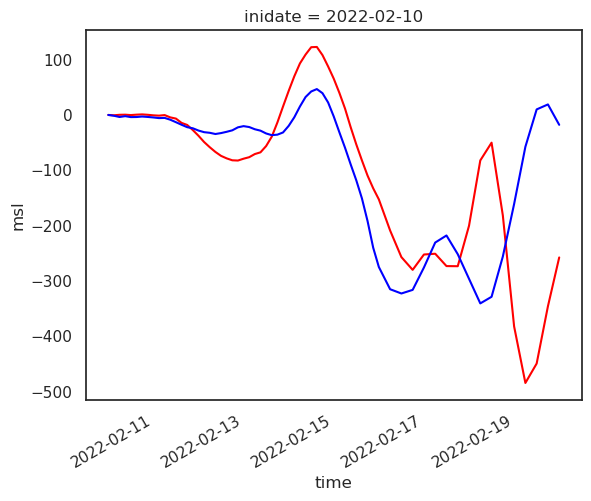

In [54]:
cc_signal_incr_curr.plot(color='red')
cc_signal_pi_curr.plot(color='blue')
# sns.move_legend(plt.gca(), loc='center left', bbox_to_anchor=(1, 0.5))

# Changes in total column water

In [59]:
cc_signal_incr_curr = (eps_incr['incr'].sel(latitude = slice(lat_max, lat_min), longitude = slice(lon_min, lon_max)).mean(dim='number').tcw - eps_curr['curr'].sel(latitude = slice(lat_max, lat_min), longitude = slice(lon_min, lon_max)).mean(dim='number').tcw).mean(dim=['latitude', 'longitude'])
cc_signal_pi_curr = (eps_curr['curr'].sel(latitude = slice(lat_max, lat_min), longitude = slice(lon_min, lon_max)).mean(dim='number').tcw - eps_pi['pi'].sel(latitude = slice(lat_max, lat_min), longitude = slice(lon_min, lon_max)).mean(dim='number').tcw).mean(dim=['latitude', 'longitude'])

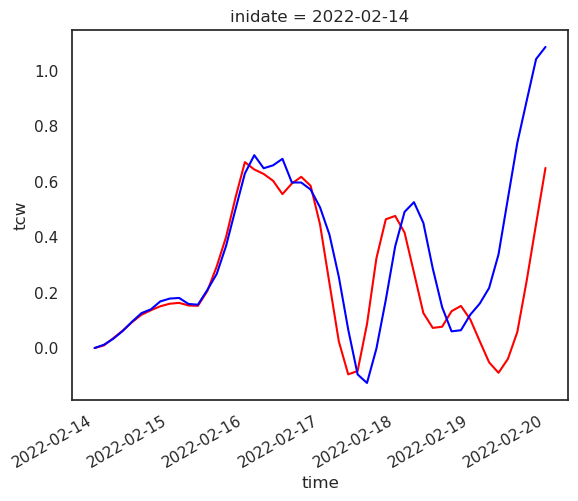

In [60]:
cc_signal_incr_curr.plot(color='red')
cc_signal_pi_curr.plot(color='blue')

# Latitudinal temperature and humidity changes

In [4]:
inidate = '2022-02-14'
experiments = ['pi', 'curr', 'incr']

eps = eun.data.Data.get_eps_pl_data(experiments, inidate = inidate, level=850)

/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/pi/EU025/pl/cf/extravars/b2nn_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/pi/EU025/pl/pf/extravars/b2nn_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/pl/cf/extravars/1_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/pl/pf/extravars/1_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/incr/EU025/pl/cf/extravars/b2no_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/incr/EU025/pl/pf/extravars/b2no_2022-02-14.nc


In [6]:
# ERA5
era5_2022 = xr.open_dataset('/gf3/predict2/AWH012_LEACH_NASTORM/DATA/ERA5/EU025/sfc/2022.nc')
era5_GUST = era5_2022.fg10.sel(time=slice('2022-02-07','2022-02-22'),latitude=slice(lat_max,lat_min),longitude=slice(lon_min, lon_max)).resample(time='1d').max().load()
era5_PRES = era5_2022.msl.sel(time=slice('2022-02-07','2022-02-22'),latitude=slice(lat_max,lat_min),longitude=slice(lon_min, lon_max)).resample(time='1d').max().load()

In [55]:
experiments = ['pi', 'curr', 'incr']
eq_pot_temp = {}

for exp in experiments:
    temp = eps[exp].mean(dim=['number', 'longitude']).t
    rel_humidity = eps[exp].mean(dim=['number', 'longitude']).r
    pot_temperature = metpy.calc.potential_temperature(850 * units.hPa, temp * units.kelvin)
    dewpoint = metpy.calc.dewpoint_from_relative_humidity(temp * units.kelvin, rel_humidity * units.percent)

    eq_pot_temp[exp] = metpy.calc.equivalent_potential_temperature(850 * units.hPa, temp * units.kelvin, dewpoint)


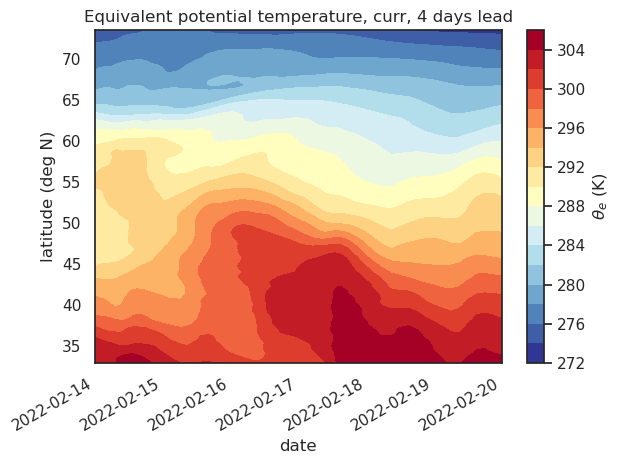

In [68]:
eq_pot_temp['curr'].plot.contourf(cmap="RdYlBu_r", x = 'time', y = 'latitude', levels = 20, cbar_kwargs = {'label' : r'$\theta_e$ (K)'})
plt.ylabel('latitude (deg N)')
plt.xlabel("date")
plt.title('Equivalent potential temperature, curr, 4 days lead')
plt.tight_layout()

plt.savefig('figures/12_theta_e_curr_Europe_Hovmoeller_inidate_'+inidate+'.png')
plt.savefig('figures/12_theta_e_curr_Europe_Hovmoeller_inidate_'+inidate+'.pdf')

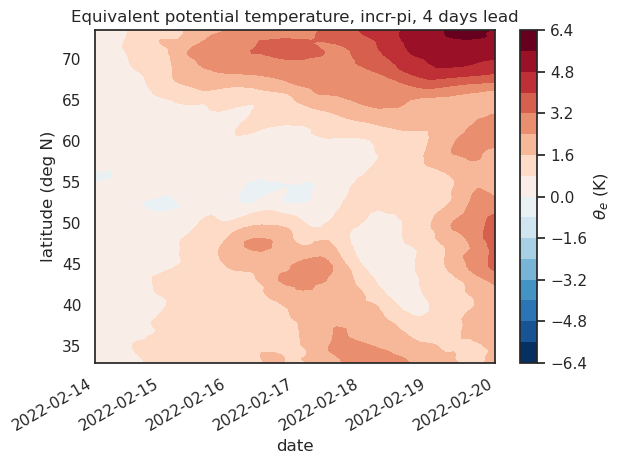

In [71]:
(eq_pot_temp['incr'] - eq_pot_temp['pi']).plot.contourf(x = 'time', y = 'latitude', levels = 20, cbar_kwargs = {'label' : r'$\theta_e$ (K)'})
plt.ylabel('latitude (deg N)')
plt.xlabel("date")
plt.title('Equivalent potential temperature, incr-pi, 4 days lead')
plt.tight_layout()

plt.savefig('figures/12_theta_e_incr-pi_Europe_Hovmoeller_inidate_'+inidate+'.png')
plt.savefig('figures/12_theta_e_incr-pi_Europe_Hovmoeller_inidate_'+inidate+'.pdf')

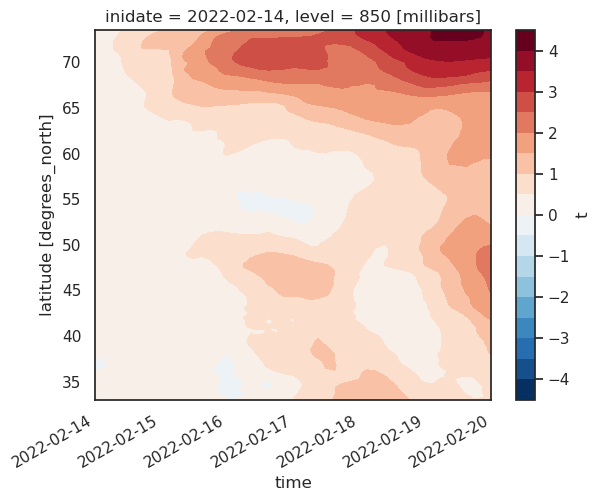

In [6]:
(eps['incr'].mean(dim=['number', 'longitude']).t - eps['pi'].mean(dim=['number', 'longitude']).t).plot.contourf(x = 'time', y = 'latitude', levels = 20)

## Hovmöller plots of specific humidity differences

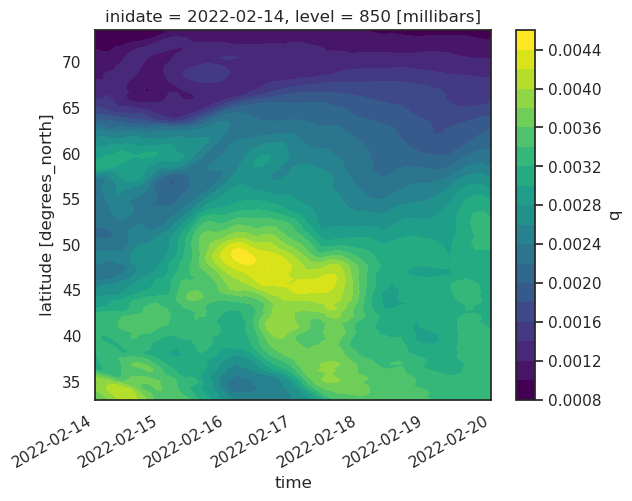

In [17]:
eps['curr'].mean(dim=['number', 'longitude']).q.plot.contourf(x = 'time', y = 'latitude', levels = 20)

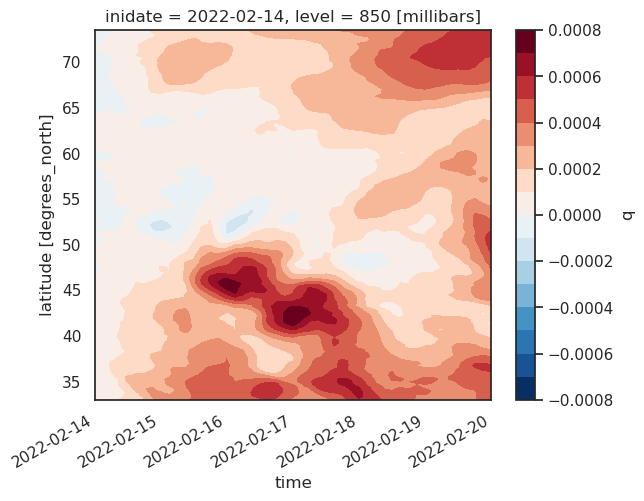

In [20]:
(eps['incr'].mean(dim=['number', 'longitude']).q - eps['pi'].mean(dim=['number', 'longitude']).q).plot.contourf(x = 'time', y = 'latitude', levels = 20)